# LIAR-RAW

In [101]:
def extract_relevant_sentences(data):
    """Extracts 'claim', 'explain', and 'evidence' sentences with is_evidence=1.

    Args:
        data: A dictionary representing a claim, explanation, and reports.
        - claim: The claim text (string).
        - label: The claim label (string, e.g., "false").
        - explain: The explanation text (string).
        - reports: A list of dictionaries, each representing a report.
            - report_id: The report ID (string).
            - link: The report link (string).
            - content: The report content (string).
            - domain: The report domain (string).
            - tokenized: A list of dictionaries, each representing a tokenized sentence.
                - sent: The sentence text (string).
                - is_evidence: A boolean indicating whether the sentence is evidence (1) or not (0).

    Returns:
        A list of dictionaries containing the extracted claim, explain, and evidence sentences.
    """

    relevant_sentences = []
    
    # Extract claim sentence (always included)
    relevant_sentences.append({"text": data["claim"], "label": "claim"})

    # Extract label (always included)
    relevant_sentences.append({"text": data["label"], "label": "label"})

    # Extract explain sentence (if it exists)
    if data["explain"]:
        relevant_sentences.append({"text": data["explain"], "label": "explain"})

    # if data["original_label"]:
    #     relevant_sentences.append({"text": data["original_label"], "label": "original_label"})



    # Extract evidence sentences from reports
    for report in data["reports"]:
        for sentence in report["tokenized"]:
            if sentence["is_evidence"] == 1 and sentence["sent"]:
                relevant_sentences.append({"text": sentence["sent"], "label": "evidence", "report_id": report["report_id"]})

    return relevant_sentences

In [102]:
import json

#read the first index of file dataset/LIAR-RAW/test.json
data = json.load(open("../dataset/LIAR-RAW/test.json"))[0]

extracted_sentences = extract_relevant_sentences(data)
for sentence in extracted_sentences:
    print(f"{sentence['label']}: {sentence['text']}")

claim: Building a wall on the U.S.-Mexico border will take literally years.
label: true
explain: Perry said: "Building a wall" on the U.S.-Mexico border "will take literally years." If Trump has a fast-track plan to plan the wall, purchase required land, complete needed studies and erect the wall in a year or less, it’s not public. Meantime, engineering experts agree the wall would most likely take years to complete. Keep in mind, too, it took more than six years to build roughly 700 miles of fence and barriers along the roughly 2,000-mile U.S.-Mexico border. Click here formore on the six PolitiFact ratings and how we select facts to check.
evidence: After pledge not to build up Trumps border wall , Bidens intention remain unclear - ABC News .
evidence: While they may not have be able to build a complete wall on the US ’ s southern border , the Trump administration have make it virtually impossible for most asylum seeker to request protection in the US .
evidence: In place , there alre

In [103]:
import pandas as pd

liar_raw_train = pd.read_json("../dataset/LIAR-RAW/train.json", orient="records")

liar_raw_train

,event_id,claim,label,explain,reports
0,2635.json,Says the Annies List political group supports ...,false,That's a premise that he fails to back up. Ann...,"[{'report_id': '7554435', 'link': 'https://en...."
1,10540.json,When did the decline of coal start? It started...,half-true,"Surovell said the decline of coal ""started whe...","[{'report_id': '9565852', 'link': 'https://sie..."
2,324.json,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true,Obama said he would have voted against the ame...,"[{'report_id': '5976314', 'link': 'https://www..."
3,1123.json,Health care reform legislation is likely to ma...,false,The release may have a point that Mikulski’s c...,"[{'report_id': '3229452', 'link': 'https://www..."
4,9028.json,The economic turnaround started at the end of ...,half-true,"Crist said that the economic ""turnaround start...","[{'report_id': '8785058', 'link': 'https://www..."
...,...,...,...,...,...
10060,5473.json,There are a larger number of shark attacks in ...,mostly-true,"One, the state’s count doesn’t represent a com...","[{'report_id': '6422575', 'link': 'http://edit..."
10061,3408.json,Democrats have now become the party of the [At...,mostly-true,"About 78,000 participated in the Georgia prima...","[{'report_id': '1502766', 'link': 'https://www..."
10062,3959.json,Says an alternative to Social Security that op...,half-true,But that debate is beyond the scope of this ar...,"[{'report_id': '4379098', 'link': 'https://www..."
10063,2253.json,On lifting the U.S. Cuban embargo and allowing...,false,The issue of travel -- which older exiles stau...,"[{'report_id': '8295201', 'link': 'https://www..."


In [104]:
# remove reports column from liar_raw
liar_raw_train = liar_raw_train.drop(columns=["reports"])

liar_raw_train

,event_id,claim,label,explain
0,2635.json,Says the Annies List political group supports ...,false,That's a premise that he fails to back up. Ann...
1,10540.json,When did the decline of coal start? It started...,half-true,"Surovell said the decline of coal ""started whe..."
2,324.json,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true,Obama said he would have voted against the ame...
3,1123.json,Health care reform legislation is likely to ma...,false,The release may have a point that Mikulski’s c...
4,9028.json,The economic turnaround started at the end of ...,half-true,"Crist said that the economic ""turnaround start..."
...,...,...,...,...
10060,5473.json,There are a larger number of shark attacks in ...,mostly-true,"One, the state’s count doesn’t represent a com..."
10061,3408.json,Democrats have now become the party of the [At...,mostly-true,"About 78,000 participated in the Georgia prima..."
10062,3959.json,Says an alternative to Social Security that op...,half-true,But that debate is beyond the scope of this ar...
10063,2253.json,On lifting the U.S. Cuban embargo and allowing...,false,The issue of travel -- which older exiles stau...


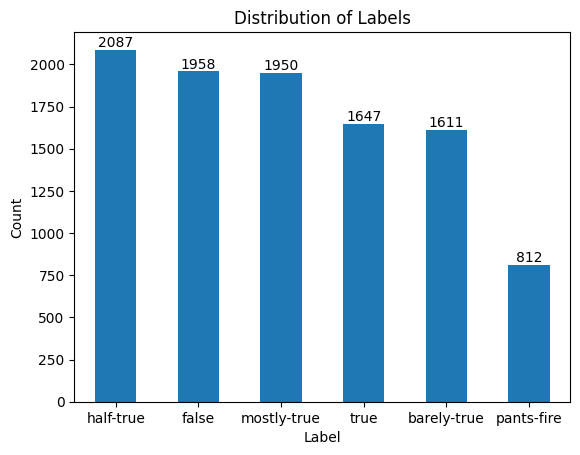

In [105]:
# get all values from label column
liar_raw_train["label"].value_counts()

# plot the distribution of labels
import matplotlib.pyplot as plt

liar_raw_train["label"].value_counts().plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks(rotation=0)  # Make x-labels horizontal
# print value on top of each bar
for i, count in enumerate(liar_raw_train["label"].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")
plt.show()

label
false        4381
true         3597
half-true    2087
Name: count, dtype: int64


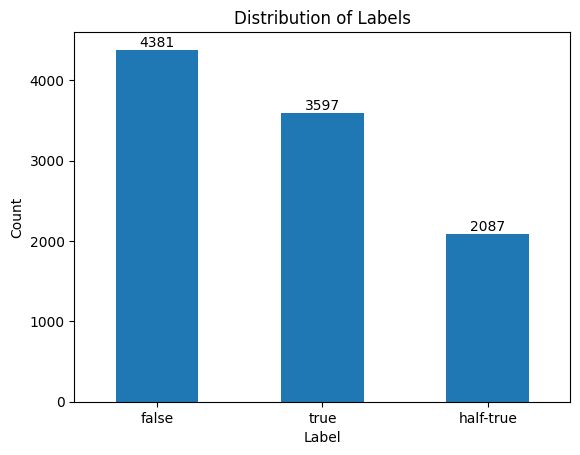

In [106]:
# reduce the number of labels to 3, merging "true" and "mostly-true" into "true" and "false" and "barely-true" and "pants-fire" into "false", and keeping "half-true" as it is
liar_raw_train["label"] = liar_raw_train["label"].replace({"mostly-true": "true", "barely-true": "false", "pants-fire": "false"})

print(liar_raw_train["label"].value_counts())

# plot the distribution of labels
liar_raw_train["label"].value_counts().plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks(rotation=0)  # Make x-labels horizontal
# print value on top of each bar
for i, count in enumerate(liar_raw_train["label"].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")
plt.show()

# RAWFC

In [107]:
import os, json
import pandas as pd

rawfc_train_path = "../dataset/RAWFC/train/"

json_files = [file for file in os.listdir(rawfc_train_path) if file.endswith(".json")]


rawfc_train_df = pd.DataFrame(columns=["event_id", "claim", "label", "original_label", "explain"])

for index, file in enumerate(json_files):
    json_data = json.load(open(rawfc_train_path + file))

    # get event_id, claim, label, explain, and original_label
    event_id = json_data["event_id"]+".json"
    claim = json_data["claim"]
    label = json_data["label"]
    original_label = json_data["original_label"]
    explain = json_data["explain"]

    # append the data to rawfc_train_df
    rawfc_train_df.loc[index] =[event_id, claim, label, original_label, explain]

# change half to half-true
rawfc_train_df["label"] = rawfc_train_df["label"].replace("half", "half-true")

rawfc_train_df

,event_id,claim,label,original_label,explain
0,198646.json,Hillary Clinton said that If Donald Trump won ...,false,false,"Back in September 2016, two months before the ..."
1,243721.json,Musician Tommy Lee wrote a letter to U.S. Pres...,false,misattributed,"In March 2020, some social media users encount..."
2,248780.json,The 1969 Woodstock music festival occurred dur...,half-true,mixture,"In the winter of 1968, the H3N2 virus, also re..."
3,263196.json,A video shows U.S. President Donald Trump call...,false,false,"In July 2020, a video supposedly showing U.S. ..."
4,190087.json,A video shows Pope Francis withdrawing his han...,true,true,Pope Francis has been the subject of a few fak...
...,...,...,...,...,...
1607,179174.json,"In January 2019, the company that makes Marlbo...",half-true,mixture,Some readers were left skeptical in January 20...
1608,190688.json,An ad for Winston brand cigarettes featured a ...,false,false,Ubiquitous cigarette advertisements of the mid...
1609,180451.json,A photograph shows a Covington Catholic High S...,true,true,In the aftermath of a controversy over a viral...
1610,155867.json,"Americans can collect ""Federal Rent Checks"" by...",half-true,mixture,In mid-2018 a spate of web sites published pos...


label
true         561
half-true    537
false        514
Name: count, dtype: int64


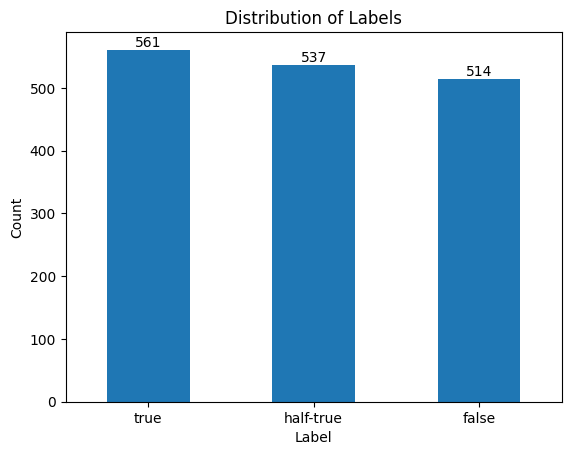

In [108]:
print(rawfc_train_df["label"].value_counts())

rawfc_train_df["label"].value_counts().plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks(rotation=0)  # Make x-labels horizontal
# print value on top of each bar
for i, count in enumerate(rawfc_train_df["label"].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")
plt.show()

original_label
false                  424
true                   390
mixture                367
unproven               170
Mostly True             90
correct attribution     81
Mostly False            68
misattributed           22
Name: count, dtype: int64


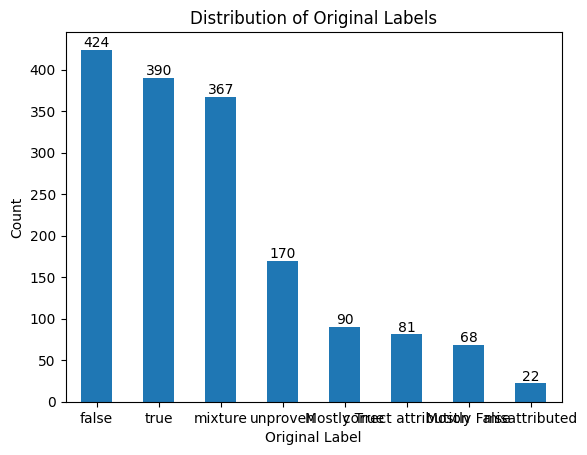

In [109]:
print(rawfc_train_df["original_label"].value_counts())

rawfc_train_df["original_label"].value_counts().plot(kind="bar")
plt.xlabel("Original Label")
plt.ylabel("Count")
plt.title("Distribution of Original Labels")
plt.xticks(rotation=0)  # Make x-labels horizontal
# print value on top of each bar
for i, count in enumerate(rawfc_train_df["original_label"].value_counts()):
    plt.text(i, count, str(count), ha="center", va="bottom")
plt.show()

In [112]:
train_df = pd.concat([liar_raw_train, rawfc_train_df], ignore_index=True)
train_df.drop(columns=["original_label"], inplace=True)

In [113]:
train_df

,event_id,claim,label,explain
0,2635.json,Says the Annies List political group supports ...,false,That's a premise that he fails to back up. Ann...
1,10540.json,When did the decline of coal start? It started...,half-true,"Surovell said the decline of coal ""started whe..."
2,324.json,"Hillary Clinton agrees with John McCain ""by vo...",true,Obama said he would have voted against the ame...
3,1123.json,Health care reform legislation is likely to ma...,false,The release may have a point that Mikulski’s c...
4,9028.json,The economic turnaround started at the end of ...,half-true,"Crist said that the economic ""turnaround start..."
...,...,...,...,...
11672,179174.json,"In January 2019, the company that makes Marlbo...",half-true,Some readers were left skeptical in January 20...
11673,190688.json,An ad for Winston brand cigarettes featured a ...,false,Ubiquitous cigarette advertisements of the mid...
11674,180451.json,A photograph shows a Covington Catholic High S...,true,In the aftermath of a controversy over a viral...
11675,155867.json,"Americans can collect ""Federal Rent Checks"" by...",half-true,In mid-2018 a spate of web sites published pos...
